**By: Tumpal Divito Siregar**

# Home Credit Score Analysis and Modeling

## A. Problem Research
### 1. Latarbelakang 
Banyak orang menghadapi kesulitan dalam memperoleh pinjaman karena minimnya atau bahkan tidak adanya riwayat kredit. Home Credit berkomitmen untuk memperluas akses keuangan bagi masyarakat yang belum terjangkau layanan perbankan dengan memberikan pengalaman pinjaman yang aman dan positif. Untuk memastikan kelompok yang kurang terlayani ini mendapatkan pengalaman yang baik, Home Credit memanfaatkan berbagai data alternatif untuk memprediksi kemampuan pembayaran klien. Dengan pendekatan ini, klien yang sebenarnya mampu membayar tidak akan ditolak, dan pinjaman diberikan dengan jumlah pokok, jangka waktu, serta jadwal pembayaran yang mendukung kesuksesan klien.
### 2. Tujuan
a. Mengidentifikasi ciri-ciri calon klien yang berpotensi mengalami kesulitan dalam melunasi pinjaman.

b. Memprediksi kemampuan klien dalam membayar pinjaman.
### 3. Langkah-Langkah:
a. Melakukan proses pembersihan data dan visualisasi untuk memperoleh wawasan bisnis.

b. Membangun model menggunakan algoritma machine learning.

c. Menguji kemampuan model terbaik dalam memprediksi kemampuan pembayaran klien pada data aplikasi.

d. Memberikan rekomendasi kepada perusahaan untuk meningkatkan peluang keberhasilan klien dalam mendapatkan pinjaman.

## B. Data Pre-Processing

In [1]:
# Import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. Menampilkan data application train

In [2]:
df_train = pd.read_csv(r"C:\Users\ASUS\Downloads\Proyek Magang HCI\Dataset\application_train.csv")
print(f'Ukuran data application train adalah {df_train.shape}') # Menampilkan dimensi data
df_train.head() # Menampilkan 5 baris data pertama

Ukuran data application train adalah (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Setelah menjalankan code diatas diperoleh informasi bahwa ukuran data application train mempunyai 307511 baris dan 122 kolom.

Dari tabel juga diperoleh informasi tentang kolom 'Target', kolom ini digunakan untuk menunjukkan apakah seorang klien (nasabah) mengalami kesulitan dalam melakukan pembayaran pinjaman. 

Definisi:

1 → Klien mengalami kesulitan pembayaran, yaitu ketika ia terlambat membayar lebih dari X hari pada setidaknya satu dari Y cicilan pertama dalam pinjaman tersebut.

0 → Klien tidak mengalami kesulitan pembayaran, artinya semua cicilan dalam periode tersebut dibayar tepat waktu atau dengan keterlambatan yang tidak melebihi X hari.

### 2.  Exploratory Data Analysis (EDA)

#### a. Memeriksa tipe data setiap kolom

In [3]:
df_train.info(verbose=True) # verbose=True menampilkan semua kolom tanpa batasan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
# Cek Nan
# Fungsi missing check
# Fungsi ini digunakan untuk mengecek jumlah missing value, keunikan tiap kolom
def missing_check(df_train) :
    wadah = []
    for i in df_train.columns :
        wadah.append(df_train[i].unique())
    missing = df_train.isnull().sum()
    per_miss = missing/len(df_train)
    data_type = df_train.dtypes
    number_unique = df_train.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})
missing_check(df_train)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
SK_ID_CURR,0,0.00%,int64,307511,[100002 100003 100004 ... 456253 456254 456255]
TARGET,0,0.00%,int64,2,[1 0]
NAME_CONTRACT_TYPE,0,0.00%,object,2,['Cash loans' 'Revolving loans']
CODE_GENDER,0,0.00%,object,3,['M' 'F' 'XNA']
FLAG_OWN_CAR,0,0.00%,object,2,['N' 'Y']
FLAG_OWN_REALTY,0,0.00%,object,2,['Y' 'N']
CNT_CHILDREN,0,0.00%,int64,15,[ 0 1 2 3 4 7 5 6 8 9 11 12 10 19 14]
AMT_INCOME_TOTAL,0,0.00%,float64,2548,[202500. 270000. 67500. ... 96768. 546250.5 113062.5]
AMT_CREDIT,0,0.00%,float64,5603,[ 406597.5 1293502.5 135000. ... 181989. 743863.5 1391130. ]
AMT_ANNUITY,12,0.00%,float64,13672,[24700.5 35698.5 6750. ... 71986.5 58770. 77809.5]


In [5]:
#melihat statistikal data
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# sebelum di boxplot, cek banyak baris yang kosong
# Menampilkan baris yang mengandung NaN
rows_with_nan = df_train[df_train.isnull().any(axis=1)]
rows_with_nan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_cleaned = df_train.dropna()
missing_check(df_cleaned)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
SK_ID_CURR,0,0.00%,int64,8602,[100083 100145 100179 ... 456140 456195 456226]
TARGET,0,0.00%,int64,2,[0 1]
NAME_CONTRACT_TYPE,0,0.00%,object,2,['Cash loans' 'Revolving loans']
CODE_GENDER,0,0.00%,object,2,['M' 'F']
FLAG_OWN_CAR,0,0.00%,object,1,['Y']
FLAG_OWN_REALTY,0,0.00%,object,2,['Y' 'N']
CNT_CHILDREN,0,0.00%,int64,6,[0 1 2 3 5 4]
AMT_INCOME_TOTAL,0,0.00%,float64,266,[ 103500. 202500. 162000. 225000. 76500. 315000. 360000. 450000. 247500. 90000. 99000. 184500. 270000. 540000. 157500. 112500. 180000. 135000. 522000. 810000. 211500. 405000. 292500. 207000. 189000. 301500. 144000. 166500. 153000. 720000. 382500. 117000. 126000. 265500. 436500. 607500. 378000. 54000. 121500. 81000. 675000. 234000. 1035000. 148500. 130050. 630000. 238500. 171000. 216000. 355500. 193500. 67500. 1350000. 468000. 337500. 139500. 576000. 585000. 427500. 396000. 877500. 229500. 198000. 72000. 130500. 108000. 252000. 338746.5 391500. 112950. 195750. 495000. 175108.5 186174. 900000. 267750. 203850. 49500. 333000. 342000. 85500. 86517. 94500. 283500. 261000. 243000. 92250. 256500. 175500. 149850. 146250. 159300. 119250. 387000. 132750. 351000. 828000. 450225. 364500. 1125000. 235107. 432000. 254700. 279000. 190350. 220500. 481500. 58500. 185400. 441000. 178200. 373500. 1358550. 348061.5 167850. 202806. 410850. 230400. 150750. 324000. 45000. 366750. 117130.5 1215000. 176400. 40500. 137250. 299700. 73615.5 306000. 562500. 236250. 2025000. 105705. 182700. 103842. 531000. 418500. 528300. 369000. 328500. 267529.5 472500. 400500. 137655. 310500. 209970. 288000. 110376. 396922.5 227700. 634500. 241200. 105750. 65250. 234900. 127926. 165798. 1307587.5 218250. 101250. 274500. 486000. 445500. 549000. 210856.5 423000. 335848.5 402750. 223807.5 236700. 131400. 221148. 263700. 990000. 162900. 571500. 89995.5 164250. 1800000. 162450. 414000. 53977.5 553500. 231741. 1575000. 120150. 51817.5 59850. 118975.5 136138.5 256297.5 765000. 159579. 184950. 517500. 661500. 111150. 128997. 74250. 459000. 621000. 293148. 153900. 128250. 409500. 837000. 945000. 208786.5 63000. 303750. 107136. 100350. 163800. 849694.5 197550. 174420. 283837.5 346500. 203400. 454500. 211932. 104611.5 108904.5 400981.5 140400. 137025. 326250. 38250. 603000. 164133. 331960.5 240750. 209992.5 155250. 297000. 1192500. 173502. 223200. 463500. 111249. 1170000. 93177. 855000. 171450. 148581. 255645. 297315. 201127.5 320400. 139455. 1306831.5 263281.5 295650. 119700. 336825. 196200. 4500000. 341550. 33750. 317029.5 2475000. 145350. 673380. 174514.5 949500. ]
AMT_CREDIT,0,0.00%,float64,1806,[ 573628.5 260725.5 675000. ... 1066500. 361462.5 711454.5]
AMT_ANNUITY,0,0.00%,float64,3862,[24435. 16789.5 53329.5 ... 31180.5 47673. 15075. ]


In [8]:
df_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [9]:
#mengecek baris duplikat.
duplicate_rows_including_first = df_cleaned[df_cleaned.duplicated(keep=False)]
duplicate_rows_including_first

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [10]:
#drop duplikat baris
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12092\3982145217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


TARGET                         1.000000
EXT_SOURCE_3                   0.150720
EXT_SOURCE_2                   0.130969
EXT_SOURCE_1                   0.129548
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
FLOORSMAX_AVG                  0.046110
FLOORSMAX_MODE                 0.045990
Name: TARGET, dtype: float64


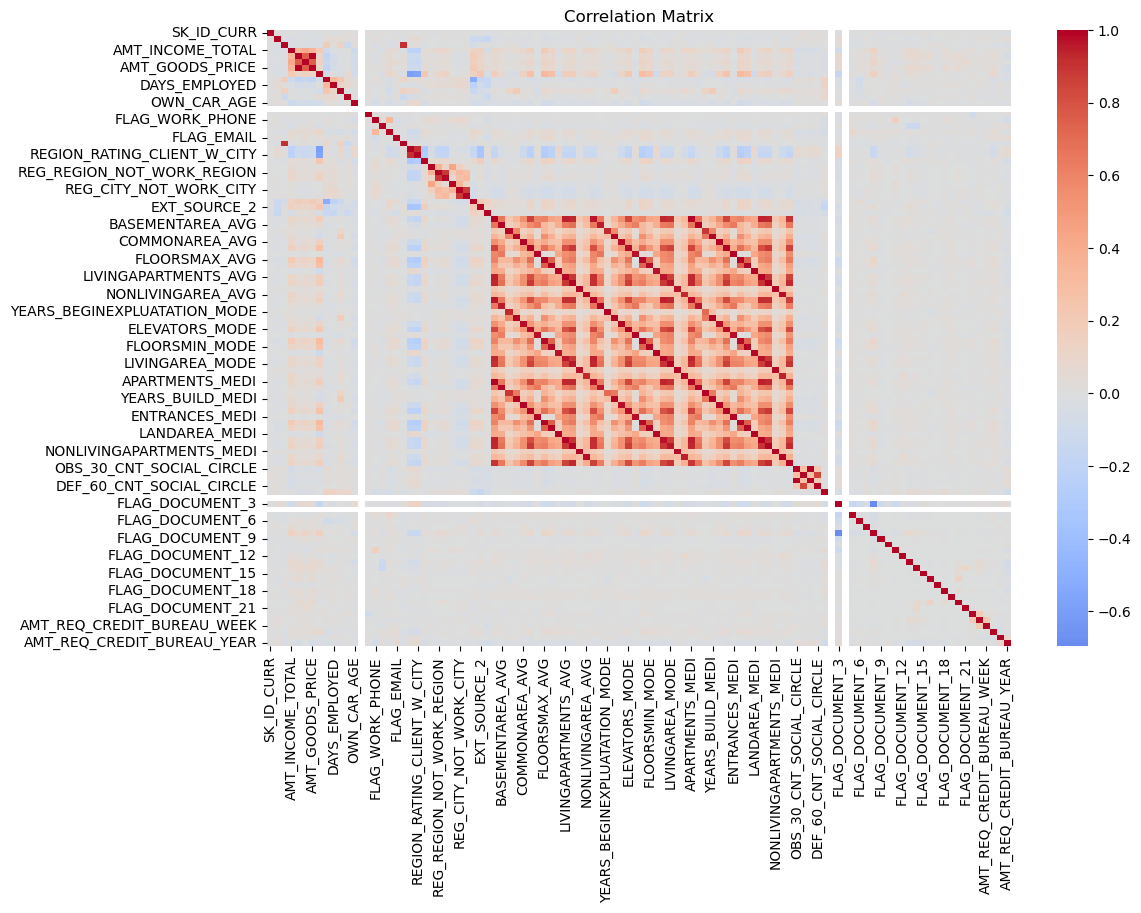

In [11]:
# Korelasi dengan kolom TARGET
corr_matrix = df_cleaned.corr()
corr_target = corr_matrix["TARGET"].abs().sort_values(ascending=False)

# Menampilkan 10 fitur teratas yang berkorelasi dengan TARGET
print(corr_target.head(10))

# Visualisasi Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# 1. Hitung Korelasi Semua Fitur dengan TARGET
corr_matrix = df_cleaned.corr()  # Menghitung matriks korelasi
corr_target = corr_matrix['TARGET'].sort_values(ascending=False)  # Korelasi terhadap TARGET

# 2. Tampilkan Fitur dengan Korelasi Lemah (< 0.05)
low_corr_features = corr_target[abs(corr_target) < 0.05].index
print("Fitur dengan Korelasi Lemah (< 0.05):\n", low_corr_features)

# 3. Drop Fitur dengan Korelasi Lemah dari DataFrame
df_cleaned2 = df_cleaned.drop(columns=low_corr_features)

# 4. Tampilkan Dimensi Data Setelah Drop
print(f"Dimensi Data Sebelum Drop: {df_cleaned.shape}")
print(f"Dimensi Data Setelah Drop: {df_cleaned2.shape}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12092\488015044.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()  # Menghitung matriks korelasi


Fitur dengan Korelasi Lemah (< 0.05):
 Index(['DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'OWN_CAR_AGE', 'DAYS_ID_PUBLISH',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_7',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'SK_ID_CURR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_19',
       'DAYS_REGISTRATION', 'NONLIVINGAPARTMENTS_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_9', 'FLAG_EMP_PHONE',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'YEARS_BEGINEXPLUATATION_MODE', 'REG_REGION_NOT_WORK_REGION',
       'AMT_ANNUITY', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_17', 'FLAG_DO

In [13]:
df_cleaned2

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4
71,0,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.270766,0.707126,0.597192,reg oper account,block of flats,"Stone, brick",No,0,1,0
124,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.647045,0.746486,0.739412,reg oper spec account,block of flats,Panel,No,0,1,0
152,0,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.674832,0.616156,0.673830,reg oper account,block of flats,Monolithic,No,0,0,0
161,0,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.534999,0.585859,0.788681,reg oper account,block of flats,Panel,No,0,1,0
255,1,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.262005,0.302394,0.463275,reg oper account,block of flats,Panel,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.653115,0.418337,0.758393,reg oper account,block of flats,"Stone, brick",No,0,1,0
307359,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.383096,0.612929,0.475850,reg oper account,block of flats,Panel,No,0,1,0
307407,1,Cash loans,F,Y,Y,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,...,0.766549,0.696695,0.624615,reg oper account,block of flats,Panel,No,0,1,0
307456,0,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.823222,0.534302,0.723837,reg oper account,block of flats,"Stone, brick",No,0,1,0


In [14]:
df = df_cleaned2

In [15]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4
71,0,Cash loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.270766,0.707126,0.597192,reg oper account,block of flats,"Stone, brick",No,0,1,0
124,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.647045,0.746486,0.739412,reg oper spec account,block of flats,Panel,No,0,1,0
152,0,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.674832,0.616156,0.673830,reg oper account,block of flats,Monolithic,No,0,0,0
161,0,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.534999,0.585859,0.788681,reg oper account,block of flats,Panel,No,0,1,0
255,1,Cash loans,M,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.262005,0.302394,0.463275,reg oper account,block of flats,Panel,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.653115,0.418337,0.758393,reg oper account,block of flats,"Stone, brick",No,0,1,0
307359,0,Cash loans,F,Y,Y,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.383096,0.612929,0.475850,reg oper account,block of flats,Panel,No,0,1,0
307407,1,Cash loans,F,Y,Y,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,...,0.766549,0.696695,0.624615,reg oper account,block of flats,Panel,No,0,1,0
307456,0,Cash loans,F,Y,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.823222,0.534302,0.723837,reg oper account,block of flats,"Stone, brick",No,0,1,0


In [16]:
df.nunique()

TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       2
FLAG_OWN_CAR                      1
FLAG_OWN_REALTY                   2
NAME_TYPE_SUITE                   7
NAME_INCOME_TYPE                  3
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
DAYS_EMPLOYED                  4288
FLAG_MOBIL                        1
OCCUPATION_TYPE                  18
REGION_RATING_CLIENT              3
REGION_RATING_CLIENT_W_CITY       3
WEEKDAY_APPR_PROCESS_START        7
ORGANIZATION_TYPE                55
EXT_SOURCE_1                   8504
EXT_SOURCE_2                   8176
EXT_SOURCE_3                    645
FONDKAPREMONT_MODE                4
HOUSETYPE_MODE                    3
WALLSMATERIAL_MODE                7
EMERGENCYSTATE_MODE               2
FLAG_DOCUMENT_2                   1
FLAG_DOCUMENT_3                   2
FLAG_DOCUMENT_4                   1
dtype: int64

In [17]:
# Identifikasi kolom dengan 2 nilai unik (biner)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Lakukan Encoding (0/1)
for col in binary_cols:
    unique_values = df[col].unique()
    df[col] = df[col].replace({unique_values[0]: 0, unique_values[1]: 1})

print(f"Binary columns encoded: {binary_cols}")


Binary columns encoded: ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3']


In [18]:
Binary =  ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_3']

In [19]:
# Mapping untuk Binary Encoding
binary_mapping = {
    'TARGET': {0: 0, 1: 1},  # 0: Tidak kesulitan bayar, 1: Kesulitan bayar
    'NAME_CONTRACT_TYPE': {'Cash loans': 0, 'Revolving loans': 1},
    'CODE_GENDER': {'F': 0, 'M': 1},
    'FLAG_OWN_REALTY': {'N': 0, 'Y': 1},
    'EMERGENCYSTATE_MODE': {'No': 0, 'Yes': 1},
    'FLAG_DOCUMENT_3': {0: 0, 1: 1}  # Asumsi biner 0/1
}


# Lakukan Encoding
for col in binary_cols:
    if col in binary_mapping:
        df[col] = df[col].replace(binary_mapping[col])

In [20]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4
71,0,0,0,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.270766,0.707126,0.597192,reg oper account,block of flats,"Stone, brick",0,0,0,0
124,0,0,1,Y,0,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.647045,0.746486,0.739412,reg oper spec account,block of flats,Panel,0,0,0,0
152,0,0,1,Y,1,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.674832,0.616156,0.673830,reg oper account,block of flats,Monolithic,0,0,1,0
161,0,0,0,Y,1,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,...,0.534999,0.585859,0.788681,reg oper account,block of flats,Panel,0,0,0,0
255,1,0,0,Y,1,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.262005,0.302394,0.463275,reg oper account,block of flats,Panel,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,0,1,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0.653115,0.418337,0.758393,reg oper account,block of flats,"Stone, brick",0,0,0,0
307359,0,0,1,Y,0,Family,Working,Secondary / secondary special,Separated,House / apartment,...,0.383096,0.612929,0.475850,reg oper account,block of flats,Panel,0,0,0,0
307407,1,0,1,Y,0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,...,0.766549,0.696695,0.624615,reg oper account,block of flats,Panel,0,0,0,0
307456,0,0,1,Y,0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,...,0.823222,0.534302,0.723837,reg oper account,block of flats,"Stone, brick",0,0,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal (tipe object)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Lakukan Encoding
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

print(f"Categorical columns encoded: {cat_cols}")


Categorical columns encoded: ['FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [22]:
from sklearn.preprocessing import LabelEncoder

# List kolom kategorikal yang akan di-encode
categorical_cols = [
    'FLAG_OWN_CAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
    'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
    'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'
]

# Inisialisasi LabelEncoder
label_enc = LabelEncoder()

# Lakukan encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    if df[col].dtype == 'object':  # Pastikan hanya untuk kolom object
        df[col] = label_enc.fit_transform(df[col].astype(str))

# Cek hasil encoding
print(df[categorical_cols].head())


     FLAG_OWN_CAR  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
71              0                6                 2                    4   
124             0                1                 2                    4   
152             0                6                 0                    1   
161             0                6                 0                    1   
255             0                6                 0                    4   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
71                    1                  1                8   
124                   2                  1                8   
152                   1                  1               10   
161                   1                  1                8   
255                   3                  1                8   

     WEEKDAY_APPR_PROCESS_START  ORGANIZATION_TYPE  FONDKAPREMONT_MODE  \
71                            1                  5                   2   
124       

In [23]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4
71,0,0,0,0,0,6,2,4,1,1,...,0.270766,0.707126,0.597192,2,0,5,0,0,0,0
124,0,0,1,0,0,1,2,4,2,1,...,0.647045,0.746486,0.739412,3,0,4,0,0,0,0
152,0,0,1,0,1,6,0,1,1,1,...,0.674832,0.616156,0.673830,2,0,2,0,0,1,0
161,0,0,0,0,1,6,0,1,1,1,...,0.534999,0.585859,0.788681,2,0,4,0,0,0,0
255,1,0,0,0,1,6,0,4,3,1,...,0.262005,0.302394,0.463275,2,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,0,0,1,0,0,6,0,4,1,1,...,0.653115,0.418337,0.758393,2,0,5,0,0,0,0
307359,0,0,1,0,0,1,2,4,2,1,...,0.383096,0.612929,0.475850,2,0,4,0,0,0,0
307407,1,0,1,0,0,5,0,1,1,1,...,0.766549,0.696695,0.624615,2,0,4,0,0,0,0
307456,0,0,1,0,0,6,2,4,1,1,...,0.823222,0.534302,0.723837,2,0,5,0,0,0,0


## Membagi data untuk split train dan test

In [24]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('TARGET', axis=1)  # Semua kolom kecuali 'TARGET'
y = df['TARGET']  # Kolom target 'TARGET'

# Membagi data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [25]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,...,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4
57157,0,0,0,1,6,2,1,1,1,-1472,...,0.134941,0.640217,0.484851,2,0,4,0,0,0,0
66145,0,1,0,0,6,2,1,3,1,-273,...,0.768679,0.730601,0.513694,2,0,4,0,0,0,0
104212,0,1,0,0,6,0,4,1,1,-522,...,0.365920,0.254569,0.169429,2,0,3,0,0,0,0
297733,0,1,0,1,6,2,1,1,1,-198,...,0.778966,0.549988,0.367291,2,0,5,0,0,0,0
291204,0,1,0,0,6,1,1,1,1,-2638,...,0.802539,0.669774,0.243186,2,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89040,0,0,0,0,6,2,4,1,1,-1250,...,0.562105,0.158299,0.263647,2,0,5,0,0,0,0
96169,1,1,0,1,6,0,4,3,2,-356,...,0.434594,0.470030,0.780144,2,0,4,0,0,0,0
94712,0,1,0,1,1,2,4,1,1,-6047,...,0.722240,0.194266,0.263647,2,0,4,0,0,0,0
127556,1,0,0,1,6,2,4,1,5,-784,...,0.492282,0.586877,0.522697,3,0,4,0,0,1,0


In [26]:
y_train

57157     0
66145     0
104212    0
297733    0
291204    0
         ..
89040     1
96169     0
94712     1
127556    0
280463    0
Name: TARGET, Length: 6881, dtype: int64

## Memeriksa Outlier

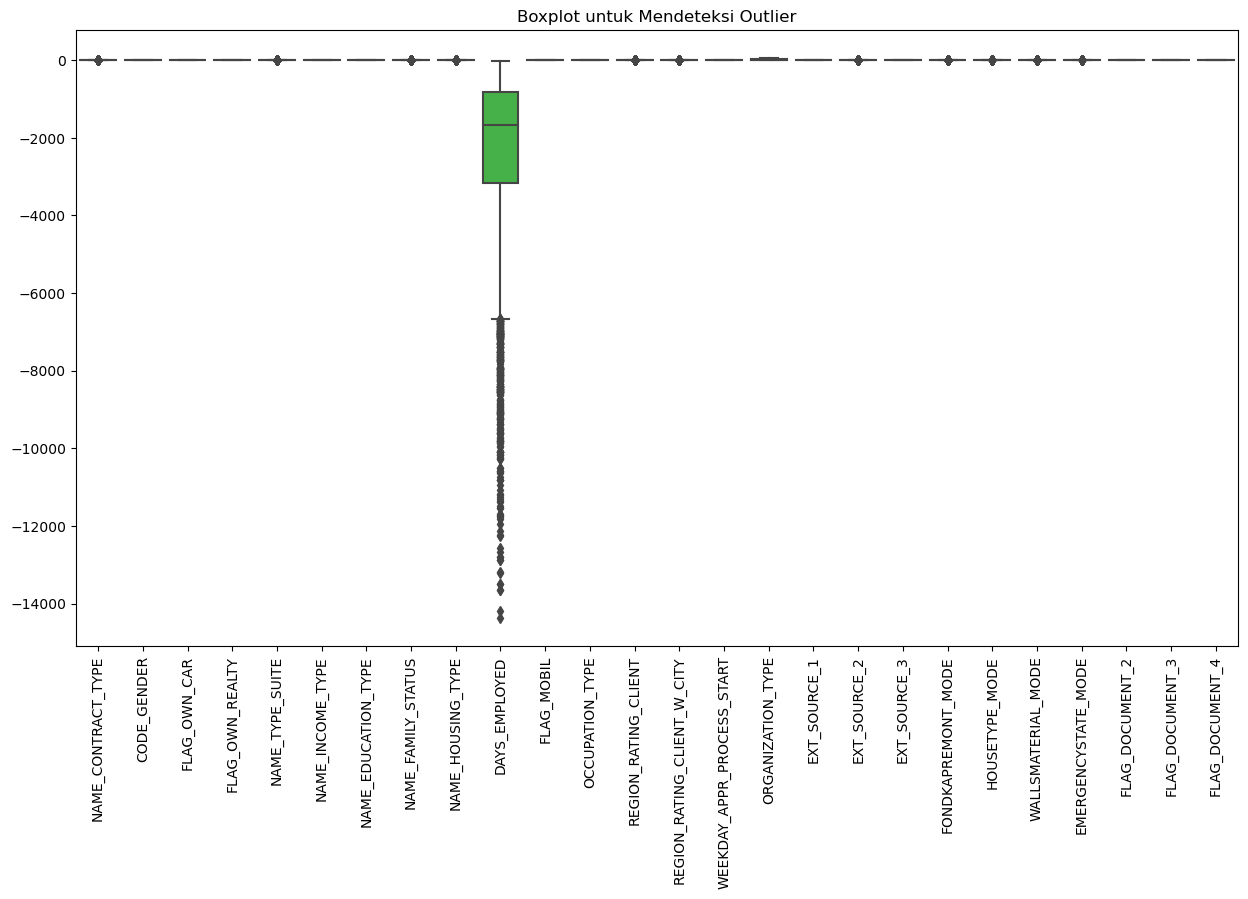

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Boxplot untuk Semua Fitur Numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()


## Pembuatan Model

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12092\3501040928.py:22: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)



🔹 Classification Report (Default Threshold 0.5):
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      1623
           1       0.11      0.69      0.19        98

    accuracy                           0.67      1721
   macro avg       0.54      0.68      0.49      1721
weighted avg       0.92      0.67      0.76      1721


🔹 Threshold terbaik berdasarkan F1-score: 0.91


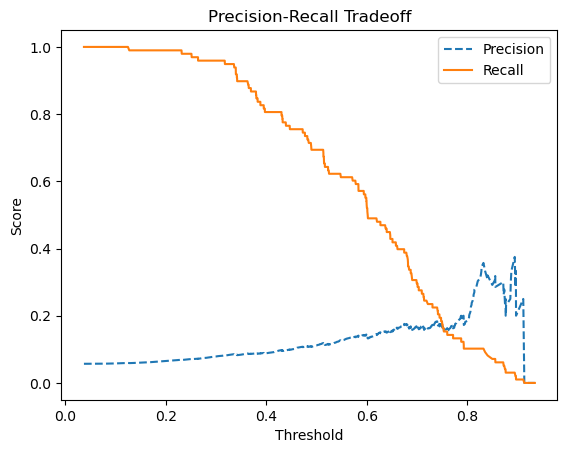


🔹 Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1623
           1       0.00      0.00      0.00        98

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.48      1721
weighted avg       0.89      0.94      0.91      1721



In [28]:
# Logistic Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve

# 1️⃣ **Latih Model Logistic Regression**
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 2️⃣ **Evaluasi Awal**
y_pred = model.predict(X_test)
print("\n🔹 Classification Report (Default Threshold 0.5):\n", classification_report(y_test, y_pred))

# 3️⃣ **Optimasi Threshold dengan Precision-Recall Curve**
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Cari threshold terbaik berdasarkan F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n🔹 Threshold terbaik berdasarkan F1-score: {best_threshold:.2f}")

# **Visualisasi Precision-Recall Tradeoff**
plt.plot(thresholds, precision[:-1], label="Precision", linestyle='--')
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall Tradeoff")
plt.show()

# 4️⃣ **Evaluasi dengan Threshold Terbaik**
y_pred_best = (y_probs >= best_threshold).astype(int)
print("\n🔹 Classification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_best))


Dari hasil evaluasi setelah menggunakan threshold optimal (0.91), tampak bahwa recall untuk kelas 1 turun drastis menjadi 0.00, artinya model tidak berhasil mendeteksi satupun klien yang berisiko gagal bayar.

Masalah yang Terjadi:
Threshold terlalu tinggi (0.91) menyebabkan model hampir selalu memprediksi kelas 0 (lancar bayar).

Recall kelas 1 = 0.00 artinya model gagal mendeteksi calon klien yang mengalami kesulitan membayar.

Skenario ini tidak sesuai dengan tujuan bisnis, karena kita ingin memprediksi risiko gagal bayar dengan baik.

Solusi:
Turunkan Threshold
Coba gunakan threshold yang lebih rendah, misalnya 0.60 atau 0.65, agar recall kelas 1 meningkat.

In [29]:
new_threshold = 0.60  # Coba juga 0.65
y_pred_new = (y_probs >= new_threshold).astype(int)

print("\nClassification Report (New Threshold):\n", classification_report(y_test, y_pred_new))



Classification Report (New Threshold):
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      1623
           1       0.14      0.52      0.22        98

    accuracy                           0.79      1721
   macro avg       0.55      0.66      0.55      1721
weighted avg       0.92      0.79      0.84      1721



In [30]:
new_threshold = 0.65  
y_pred_new = (y_probs >= new_threshold).astype(int)

print("\nClassification Report (Threshold 0.65):\n", classification_report(y_test, y_pred_new))



Classification Report (Threshold 0.65):
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1623
           1       0.15      0.43      0.23        98

    accuracy                           0.83      1721
   macro avg       0.56      0.64      0.57      1721
weighted avg       0.92      0.83      0.87      1721



In [31]:
new_threshold = 0.62
y_pred_new = (y_probs >= new_threshold).astype(int)

print("\nClassification Report (Threshold 0.62):\n", classification_report(y_test, y_pred_new))



Classification Report (Threshold 0.62):
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1623
           1       0.14      0.48      0.22        98

    accuracy                           0.81      1721
   macro avg       0.55      0.65      0.55      1721
weighted avg       0.92      0.81      0.85      1721



In [32]:
from sklearn.metrics import classification_report

# Dapatkan probabilitas prediksi pada data test
y_probs_test = model.predict_proba(X_test)[:, 1]

# Gunakan threshold yang sudah ditentukan (misalnya 0.62)
new_threshold = 0.62
y_pred_test = (y_probs_test >= new_threshold).astype(int)

# Evaluasi model pada data test
print("\n🔹 Classification Report (Test Data, Threshold 0.62):\n")
print(classification_report(y_test, y_pred_test))



🔹 Classification Report (Test Data, Threshold 0.62):

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1623
           1       0.14      0.48      0.22        98

    accuracy                           0.81      1721
   macro avg       0.55      0.65      0.55      1721
weighted avg       0.92      0.81      0.85      1721



Dari hasil evaluasi model pada data test, performanya masih sejalan dengan data train, dengan akurasi 81% dan nilai recall kelas 1 (gagal bayar) sebesar 48%.

Kesimpulan sementara:

Recall kelas 1 meningkat dibanding threshold default (0.5), artinya model lebih banyak menangkap calon peminjam yang berpotensi gagal bayar.

Precision kelas 1 masih rendah (14%), artinya banyak prediksi gagal bayar yang ternyata lunas.

Akurasi masih tinggi (81%), tapi perlu dicek apakah masih bisa ditingkatkan tanpa mengorbankan recall.

In [33]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))



Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1623
           1       0.00      0.00      0.00        98

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.94      0.92      1721



C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil Random Forest menunjukkan bahwa model terlalu berpihak pada kelas mayoritas (0), sehingga kelas minoritas (1) tidak terdeteksi sama sekali (recall = 0.00). Ini menandakan bahwa model mengalami class imbalance issue, seperti yang juga kita lihat pada Logistic Regression sebelum menyesuaikan threshold.

In [34]:
# Random Forest dengan class_weight terlebih dahulu:

# Inisialisasi model Random Forest dengan class_weight
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training model
rf_model_balanced.fit(X_train, y_train)

# Prediksi pada data test
y_pred_rf_balanced = rf_model_balanced.predict(X_test)

# Evaluasi model
print("\nClassification Report (Random Forest - Balanced):\n", classification_report(y_test, y_pred_rf_balanced))



Classification Report (Random Forest - Balanced):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1623
           1       1.00      0.01      0.02        98

    accuracy                           0.94      1721
   macro avg       0.97      0.51      0.50      1721
weighted avg       0.95      0.94      0.92      1721



Hasil Random Forest dengan class_weight='balanced' masih menunjukkan masalah recall yang sangat rendah untuk kelas 1 (hanya 0.01). Ini berarti model hampir selalu mengklasifikasikan data sebagai kelas mayoritas (0).

In [37]:
# Prediksi pada data test
y_pred_rf_balanced = rf_model_balanced.predict(X_test)

# Evaluasi model pada data test
print("\nClassification Report (Random Forest - Balanced, Test Data):\n", classification_report(y_test, y_pred_rf_balanced))



Classification Report (Random Forest - Balanced, Test Data):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1623
           1       1.00      0.01      0.02        98

    accuracy                           0.94      1721
   macro avg       0.97      0.51      0.50      1721
weighted avg       0.95      0.94      0.92      1721



Hasil Random Forest - Balanced menunjukkan bahwa model memiliki accuracy 94%, tetapi dengan recall yang sangat rendah untuk kelas 1 (hanya 1%). Ini berarti model hampir tidak mengenali klien yang berpotensi gagal bayar, yang merupakan tujuan utama analisis ini.

In [38]:
# XGboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost dengan class_weight diimbangi
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Menyeimbangkan kelas
    random_state=42
)

# Training model
xgb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model
print("\nClassification Report (XGBoost - Test Data):\n", classification_report(y_test, y_pred_xgb))



Classification Report (XGBoost - Test Data):
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1623
           1       0.12      0.23      0.16        98

    accuracy                           0.85      1721
   macro avg       0.53      0.56      0.54      1721
weighted avg       0.90      0.85      0.88      1721



In [39]:
# lightgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Inisialisasi model LightGBM dengan class_weight seimbang
lgbm_model = LGBMClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    class_weight='balanced',  # Menyeimbangkan kelas otomatis
    random_state=42
)

# Training model
lgbm_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluasi model
print("\nClassification Report (LightGBM - Test Data):\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 428, number of negative: 6453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of data points in the train set: 6881, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

## Kesimpulan

Kesimpulan:

Logistic Regression (Threshold 0.62) memiliki recall tertinggi (0.48) untuk kelas 1, tetapi akurasi keseluruhannya lebih rendah.

LightGBM lebih baik dari XGBoost dan jauh lebih baik dari Random Forest dalam mengenali kelas 1, dengan recall 0.34 dan f1-score lebih tinggi.

Random Forest cenderung overfitting ke kelas mayoritas (kelas 0), sehingga recall kelas 1 hanya 0.01—sangat buruk untuk tujuan kita.

XGBoost lebih baik dari Random Forest, tetapi masih kurang bagus dibandingkan LightGBM dan Logistic Regression.

Rekomendasi:
Jika tujuan utama adalah mendeteksi calon klien yang berpotensi kesulitan membayar, maka:
Gunakan Logistic Regression (Threshold 0.62) atau LightGBM karena recall untuk kelas 1 lebih baik.
Jika ingin keseimbangan antara akurasi dan deteksi kelas 1, LightGBM bisa menjadi pilihan terbaik.
Jangan gunakan Random Forest karena gagal mengenali kelas 1 dengan baik.

Dalam upaya mengidentifikasi ciri-ciri calon klien yang berpotensi mengalami kesulitan dalam melunasi pinjaman serta memprediksi kemampuan klien dalam membayar pinjaman, beberapa model machine learning telah diuji, yaitu Logistic Regression, Random Forest, XGBoost, dan LightGBM.

Hasil evaluasi menunjukkan bahwa:

Logistic Regression dengan threshold 0.62 dan LightGBM memberikan hasil terbaik dalam mengenali klien yang berpotensi mengalami kesulitan membayar (kelas 1).

Random Forest mengalami overfitting pada kelas mayoritas (kelas 0), sehingga tidak efektif dalam mendeteksi calon klien yang berisiko gagal bayar.

XGBoost memiliki performa lebih baik dari Random Forest, tetapi masih kalah dalam recall dibandingkan LightGBM dan Logistic Regression.



## Saran
Berdasarkan latar belakang, tujuan, dan hasil evaluasi model, berikut adalah saran yang dapat diberikan kepada perusahaan(Home Credit) secara strategis dan teknis:


### Saran Strategis dan Teknis untuk Home Credit Indonesia

#### 1. Gunakan Model denga Recall Tinggi untuk Kelas 1

Karena tujuan utama adalah mendeteksi calon klien yang berpotensi mengalami kesulitan membayar (kelas 1), maka:

- Gunakan Logistic Regression (dengan threshold 0.62) atau LightGBM.

- Kedua model ini terbukti memberikan recall yang relatif tinggi untuk kelas 1, yang berarti mereka lebih sensitif terhadap risiko gagal bayar.

- LightGBM juga memiliki f1-score lebih tinggi, yang menunjukkan keseimbangan yang baik antara recall dan precision.

#### 2. Pertimbangkan Threshold Adjustment sebagai Strategi

- Threshold 0.62 pada Logistic Regression menunjukkan hasil yang lebih optimal dibanding default threshold (0.5).

- Oleh karena itu, selain memilih model, penting juga untuk melakukan threshold tuning pada model klasifikasi agar sesuai dengan kebutuhan bisnis (misalnya: lebih mementingkan recall daripada akurasi total).

#### 3. Hindari Model yang Terlalu Overfitting pada Kelas Mayoritas

- Random Forest sebaiknya tidak digunakan, karena sangat lemah dalam mendeteksi kelas minoritas (kelas 1), yang merupakan fokus utama.

- Overfitting pada kelas 0 berarti model cenderung “main aman” dan menolak hampir semua calon klien berisiko, padahal beberapa di antaranya mungkin sebenarnya layak diberi pinjaman dengan pendekatan yang tepat.

#### 4. Model Tambahan untuk Validasi dan Peningkatan

- Coba pendekatan ensembel voting antara Logistic Regression dan LightGBM untuk menyatukan kekuatan keduanya.

- Gunakan analisis SHAP atau feature importance untuk mengetahui ciri-ciri apa saja yang paling berpengaruh terhadap keputusan model, guna membantu divisi risiko dalam pengambilan keputusan yang lebih transparan dan akuntabel.

#### 5. Tindak Lanjut Non-Teknis

- Gunakan hasil prediksi untuk menyesuaikan skema pinjaman (besaran, tenor, dan jadwal) sehingga lebih sesuai dengan kemampuan pembayaran klien.

- Terapkan sistem pemantauan lanjutan bagi klien yang diklasifikasikan sebagai borderline, misalnya dengan edukasi finansial, reminder pembayaran, atau intervensi dini jika muncul tanda risiko gagal bayar.
